In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [2]:
HOME="/home/spoudel/All_Thesis/Thesis_program/Data"
project="lathrop"
location="location_3"

final_data_folder="final_data_to_train_on"

model_predicted_folder="KMeans"

In [3]:
data=pd.read_csv(f"{HOME}/{project}/{location}/{final_data_folder}/data_pc_{project}_{location}.csv")
data=data[["p0","p1","p2","p3","p4","p5","p6"]]
data

,p0,p1,p2,p3,p4,p5,p6
0,-2.000000,0.573009,0.268992,0.435167,-0.690152,0.759216,1.447293
1,-2.000000,0.253751,0.106134,0.715423,0.409607,-0.523038,2.000000
2,-2.000000,-0.750123,2.000000,-0.722078,-0.026242,1.421450,-0.385574
3,-1.588203,-0.786085,1.551915,-0.656492,2.000000,-0.204647,0.743801
4,0.343472,-0.066512,-0.374155,0.615094,2.000000,-0.370116,2.000000
...,...,...,...,...,...,...,...
1302,-1.554650,0.000245,-0.364649,1.076237,-1.037974,-0.960176,-0.229654
1303,-1.221393,-0.538432,0.432648,0.027525,-1.221077,-0.685200,-0.676892
1304,-0.604505,-0.800067,0.396034,-0.342428,-1.129213,-0.879903,-0.207904
1305,-0.171578,-1.042572,-0.098406,-0.737191,-0.680740,-0.255571,-0.076075


In [4]:
train=np.array(data)
train=train
train

array([[-2.        ,  0.57300904,  0.26899243, ..., -0.69015183,
         0.75921605,  1.44729306],
       [-2.        ,  0.25375117,  0.10613368, ...,  0.40960743,
        -0.5230379 ,  2.        ],
       [-2.        , -0.75012256,  2.        , ..., -0.02624168,
         1.42144989, -0.38557391],
       ...,
       [-0.60450502, -0.80006695,  0.3960336 , ..., -1.12921272,
        -0.87990287, -0.2079044 ],
       [-0.17157767, -1.04257154, -0.09840604, ..., -0.68073966,
        -0.25557107, -0.07607497],
       [-0.15749797, -1.1681791 , -0.14670199, ..., -0.68380124,
        -0.83972479, -0.03000315]])

In [5]:
pca = PCA(n_components=7)
pca.fit(train)
np.sum(pca.explained_variance_ratio_)

1.0000000000000002

[0.18712553149532127,
 0.35864517446011124,
 0.49950025502252204,
 0.6332942454970285,
 0.7627677776375748,
 0.8849279951929694,
 1.0000000000000002]

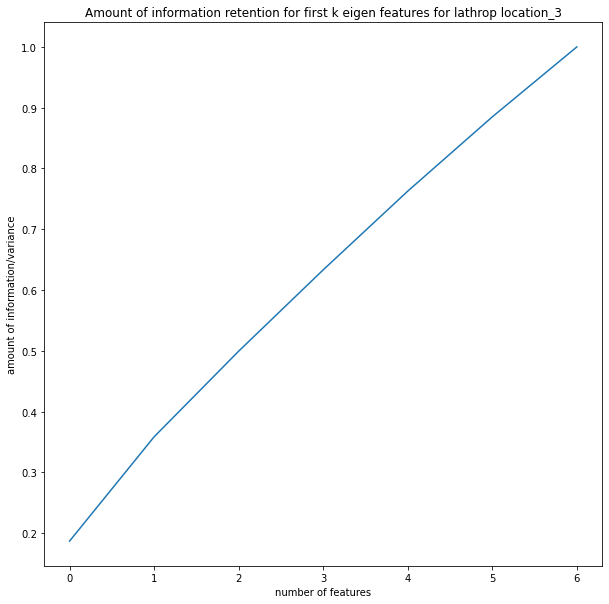

In [6]:
def plot_information_retention_by_pca(data):
    input_dimension=min(len(data[0]),len(data))
    information_retention=[]
    for i in range(input_dimension):
        pca = PCA(n_components=i+1)
        pca.fit(data)
        information_retention.append(np.sum(pca.explained_variance_ratio_))
        
    plt.figure(figsize=(10,10))
    plt.plot(range(input_dimension),information_retention)
    plt.xlabel("number of features")
    plt.ylabel("amount of information/variance")
    plt.title(f"Amount of information retention for first k eigen features for {project} {location}")
    return information_retention
    
plot_information_retention_by_pca(train)

In [7]:
# # Test PCA

# from sklearn.datasets import load_breast_cancer
# breast = load_breast_cancer()
# breast_data = breast.data
# breast_labels = breast.target
# labels = np.reshape(breast_labels,(569,1))
# final_breast_data = np.concatenate([breast_data,labels],axis=1)
# breast_dataset = pd.DataFrame(final_breast_data)
# features = breast.feature_names
# features_labels = np.append(features,'label')
# breast_dataset.columns = features_labels
# breast_dataset.head()
# from sklearn.preprocessing import StandardScaler
# x = breast_dataset.loc[:, features].values
# x = StandardScaler().fit_transform(x) # normalizing the features
# plot_information_retention_by_pca(x)